# Analyze from Data Insurance

### 1. Perform basic exploratory data analysis which include the following and print out your insight at every step

- The shape of the data
- The data type of each attribute
- Checking the presence of missing values
- 5 points summary of numerical attributes
- Distribution of 'bmi', 'age', and 'charges' columns
- The measure of skewness of 'bmi', 'age', and 'charges' columns
- Checking the presence of outliers in 'bmi', 'age', and 'charges' columns

In [1]:
# import module pandas 
import pandas as pd

#import file csv and display the top 5 data
df = pd.read_csv(r'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### a. Checking shapae of the data

In [2]:
# checking shape of the data

df.shape

(1338, 7)

##### b. Checking data type

In [3]:
# checking data type of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### c. Checking missing values

In [17]:
# checking the presence of missing values

age_null = pd.isnull(df['age'])
sex_null = pd.isnull(df['sex'])
bmi_null = pd.isnull(df['bmi'])
child_null = pd.isnull(df['children'])
smoke_null = pd.isnull(df['smoker'])
reg_null = pd.isnull(df['region'])
charg_null = pd.isnull(df['charges'])

#let's check is there any null value in the columns
df[age_null]

,age,sex,bmi,children,smoker,region,charges


In [18]:
df[sex_null]

,age,sex,bmi,children,smoker,region,charges


In [19]:
df[bmi_null]

,age,sex,bmi,children,smoker,region,charges


In [20]:
df[child_null]

,age,sex,bmi,children,smoker,region,charges


In [21]:
df[smoke_null]

,age,sex,bmi,children,smoker,region,charges


In [22]:
df[reg_null]

,age,sex,bmi,children,smoker,region,charges


In [23]:
df[charg_null]

,age,sex,bmi,children,smoker,region,charges


###### there is no missing value

##### d. 5 points summary of numerical attributes

In [24]:
# 5 points summary of numerical attributes

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### e. Distribution of 'bmi', 'age', and 'charges'

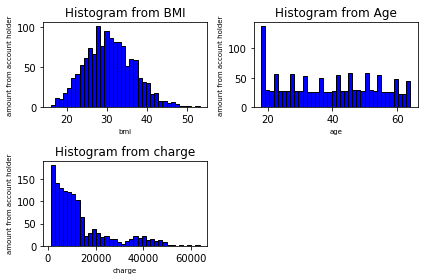

In [37]:
# distribution of 'bmi', 'age', and 'charges'

#import module
import matplotlib.pyplot as plt

#set up and draw the plot

ax1 = plt.subplot(2,2,1)
ax1.hist(df['bmi'], bins = int(180/5),
        color='blue',edgecolor='black')
ax1.set_title('Histogram from BMI')
ax1.set_xlabel('bmi', size=7)
ax1.set_ylabel('amount from account holder', size = 7)

ax2 = plt.subplot(2,2,2)
ax2.hist(df['age'],bins = int(180/5),
        color='blue',edgecolor='black')
ax2.set_title('Histogram from Age')
ax2.set_xlabel('age',size=7)
ax2.set_ylabel('amount from account holder', size=7)

ax3 = plt.subplot(2,2,3)
ax3.hist(df['charges'],bins=int(180/5),
        color='blue',edgecolor='black')
ax3.set_title('Histogram from charge')
ax3.set_xlabel('charge',size=7)
ax3.set_ylabel('amount from account holder',size=7)

plt.tight_layout()
plt.show()


##### f. Skewness

In [43]:
# the measure of skewness of 'bmi','age', and 'charges' columns

bmi_skew = df['bmi'].skew()
age_skew = df['age'].skew()
charge_skew = df['charges'].skew()

print('Skewness of BMI :', bmi_skew)
print('Skewness of Age :', age_skew)
print('Skewness of charges :', charge_skew)

Skewness of BMI : 0.2840471105987448
Skewness of Age : 0.05567251565299186
Skewness of charges : 1.5158796580240388


##### g. Outliers

In [55]:
#Checking the presence of outliers in 'bmi', 'age', and 'charges columns

import numpy as np

#outliers from BMI using IQR

bmi_sort = sorted(df['bmi'])
q1_bmi, q3_bmi = np.percentile(bmi_sort,[25,75])
iqr_bmi = q3_bmi - q1_bmi
bmi_lower_bound = q1_bmi - (1.5*iqr_bmi)
bmi_upper_bound = q3_bmi + (1.5*iqr_bmi)

print('BMI')
print('lower bound bmi :', bmi_lower_bound)
print('upper bound bmi :', bmi_upper_bound)

outliers_BMI = []
for i in bmi_sort:
    if i < bmi_lower_bound or i > bmi_upper_bound:
        outliers_BMI.append(i)
print('outliers from BMI :', outliers_BMI)

#outliers from Age using IQR

age_sort = sorted(df['age'])
q1_age, q3_age = np.percentile(age_sort,[25,75])
iqr_age = q3_age - q1_age
age_lower_bound = q1_age - (1.5*iqr_age)
age_upper_bound = q3_age + (1.5*iqr_age)

print('---------------------------------')
print('AGE')
print('lower bound age :', age_lower_bound)
print('upper bound age :', age_upper_bound)

outliers_age = []
for i in age_sort:
    if i < age_lower_bound or i > age_upper_bound:
        outliers_age.append(i)
print('outliers from AGE :', outliers_age)

#outliers from Charges using IQR

chg_sort = sorted(df['charges'])
q1_chg, q3_chg = np.percentile(bmi_sort,[25,75])
iqr_chg = q3_chg - q1_chg
chg_lower_bound = q1_chg - (1.5*iqr_chg)
chg_upper_bound = q3_chg + (1.5*iqr_chg)

print('---------------------------------')
print('Charges')
print('lower bound charge :', chg_lower_bound)
print('upper bound charge :', chg_upper_bound)

outliers_chg = []
for i in chg_sort:
    if i < chg_lower_bound or i > chg_upper_bound:
        outliers_chg.append(i)
print('outliers from Charges :', outliers_chg)

BMI
lower bound bmi : 13.7
upper bound bmi : 47.290000000000006
outliers from BMI : [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]
---------------------------------
AGE
lower bound age : -9.0
upper bound age : 87.0
outliers from AGE : []
---------------------------------
Charges
lower bound charge : 13.7
upper bound charge : 47.290000000000006
outliers from Charges : [1121.8739, 1131.5066, 1135.9407, 1136.3994, 1137.011, 1137.4697, 1141.4451, 1146.7966, 1149.3959, 1163.4627, 1241.565, 1242.26, 1242.816, 1252.407, 1253.9360000000001, 1256.299, 1261.442, 1261.859, 1263.249, 1391.5287, 1515.3449, 1526.3120000000001, 1532.4697, 1534.3045, 1607.5101, 1615.7667, 1621.3402, 1621.8827, 1622.1885, 1625.43375, 1627.28245, 1628.4709, 1629.8335, 1631.6683, 1631.8212, 1632.03625, 1632.56445, 1633.0444, 1633.9618, 1634.5734, 1635.73365, 1639.5631, 1639.5631, 1646.4297, 1664.9996, 1674.6323, 1682.5970000000002, 1694.7964, 1702.4553, 1704.5681, 1704.70015, 1705.6245, 1708.0014, 1708.92

##### Analyze the results of calculating outliers
Dari hasil perhitungan outliers menggunakan IQR diatas, diketahui bahwa hasil untuk 'age' dan 'charges' menimbulkan pertanyaan karena pada 'age' menunjukkan tidak adanya outliers, sedangkan pada 'charge' outliers terlalu banyak. Hal ini cukup wajar mengingat kedua atribut ini tidak memiliki distribusi normal. Maka untuk analisa lebih lanjut kita perlu membuat boxplot untuk kedua data kolom ini.

Text(0.5, 1.0, 'box plot from charge')

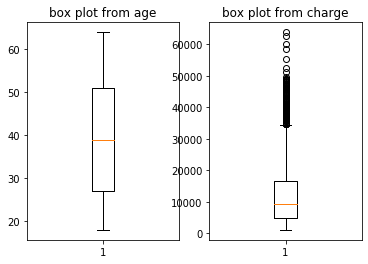

In [63]:
bx1 = plt.subplot(1,2,1)
bx1.boxplot(df['age'])
bx1.set_title('box plot from age')

bx2 = plt.subplot(1,2,2)
bx2.boxplot(df['charges'])
bx2.set_title('box plot from charge')

dari gambar boxplot diatas, dapat dianalisa bahwa untuk kolom 'age' tidak ada yang dianggap sebagai outliers karena distribusi data cukup merata, sedangkan untuk kolom charges, saya membuat keputusan dengan mengatakan data dengan nilai diatas 33000 sebagai outliers.

In [64]:
#outliers from charges

ouliers_chg = []

for i in df['charges']:
    if i > 33000:
        outliers_chg.append(i)

print('Outliers from charges:',outliers_chg)

Outliers from charges: [1121.8739, 1131.5066, 1135.9407, 1136.3994, 1137.011, 1137.4697, 1141.4451, 1146.7966, 1149.3959, 1163.4627, 1241.565, 1242.26, 1242.816, 1252.407, 1253.9360000000001, 1256.299, 1261.442, 1261.859, 1263.249, 1391.5287, 1515.3449, 1526.3120000000001, 1532.4697, 1534.3045, 1607.5101, 1615.7667, 1621.3402, 1621.8827, 1622.1885, 1625.43375, 1627.28245, 1628.4709, 1629.8335, 1631.6683, 1631.8212, 1632.03625, 1632.56445, 1633.0444, 1633.9618, 1634.5734, 1635.73365, 1639.5631, 1639.5631, 1646.4297, 1664.9996, 1674.6323, 1682.5970000000002, 1694.7964, 1702.4553, 1704.5681, 1704.70015, 1705.6245, 1708.0014, 1708.92575, 1711.0268, 1712.227, 1719.4363, 1720.3537, 1725.5523, 1727.54, 1727.785, 1728.8970000000002, 1731.6770000000001, 1737.376, 1743.214, 1744.465, 1748.774, 1759.338, 1769.53165, 1815.8759, 1824.2854, 1826.8429999999998, 1832.094, 1837.237, 1837.2819, 1842.519, 1875.344, 1877.9294, 1880.07, 1880.487, 1906.35825, 1909.52745, 1917.3184, 1964.78, 1967.0227, 1969.

##### Advanced analysis 

hasil yang didapatkan ketika saya menentukan batas outlier yang didapatkan dari boxplot memiliki hasil yang sama dengan perhitungan IQR. Hal ini menunjukkan bahwa perhitungan outliers tetap bisa dilakukan dengan IQR walau distribusi nya tidak normal.

### 2. Answer the following questions with statistical evidence

A. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [71]:
import math

smoke_count = df[df['smoker']=='yes'].count()[0] #amount data from who smoke
notsmoke_count = df[df['smoker']=='no'].count()[0] #amount data from who dont
mean_popu = df['charges'].mean() #mean from population
std_popu = df['charges'].std() #standard deviation population
std_smoke = std_popu/(math.sqrt(smoke_count)) #std who smoke
std_notsmoke = std_popu/(math.sqrt(notsmoke_count)) #std who dont 


df_smoke = df[df['smoker']=='yes'] #dataframe who smoke
mean_smoke = df_smoke['charges'].mean() #mean from who smoke

df_notsmoke = df[df['smoker']=='no'] #dataframe who dont
mean_notsmoke = df_notsmoke['charges'].mean() #mean from who dont

# calculate z score from people who smoke
z_smoke = (mean_smoke - mean_popu)/std_smoke
z_dont = (mean_notsmoke- mean_popu)/std_notsmoke

print('z score who smoke :', z_smoke)
print('z score who dont smoke :', z_dont)

z score who smoke : 25.669766567189914
z score who dont smoke : -13.026459296480342


###### so the answer is : yes, they do.